In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

In [2]:
columns = ['Time', 'ID', 'Latitude', 'Longitude', 'Height', 'Code', 'Name']

In [3]:
bad_18 = pd.read_csv('BadTracksHackaton1801.txt', sep=" ", header=None)
good_18 = pd.read_csv('GoodTracksHackaton1801.txt', sep=" ", header=None)
bad_18.columns = columns
good_18.columns = columns

In [4]:
bad_21 = pd.read_csv('BadTracksHackaton2101.txt', sep=" ", header=None)
good_21 = pd.read_csv('GoodTracksHackaton2101.txt', sep=" ", header=None)
bad_21.columns = columns
good_21.columns = columns

In [5]:
bad_23 = pd.read_csv('BadTracksHackaton2301.txt', sep=" ", header=None)
good_23 = pd.read_csv('GoodTracksHackaton2301.txt', sep=" ", header=None, encoding='cp1251')
bad_23.columns = columns
good_23.columns = columns

In [6]:
bad_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628579 entries, 0 to 628578
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       628579 non-null  object 
 1   ID         628579 non-null  int64  
 2   Latitude   628579 non-null  float64
 3   Longitude  628579 non-null  float64
 4   Height     628579 non-null  int64  
 5   Code       585804 non-null  float64
 6   Name       540154 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 33.6+ MB


In [7]:
bad_21.ID = -1*bad_21.ID
good_21.ID = -1*good_21.ID

In [8]:
bad_ind_18 = bad_18.ID.value_counts().index
good_ind_18 = good_18.ID.value_counts().index
set(bad_ind_18).intersection(set(good_ind_18))

set()

In [9]:
bad_ind_21 = bad_21.ID.value_counts().index
good_ind_21 = good_21.ID.value_counts().index
set(bad_ind_21).intersection(set(good_ind_21))

set()

In [10]:
print(sorted(set(bad_ind_18).intersection(set(good_ind_21))))
print(sorted(set(bad_ind_18).intersection(set(bad_ind_21))))
print(sorted(set(good_ind_18).intersection(set(good_ind_21))))

[]
[]
[]


In [11]:
def to_seconds(x):
    h, m, s = x.split(':')
    result = int(h) * 60 * 60 + int(m) * 60 + int(s)
    return result

In [12]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

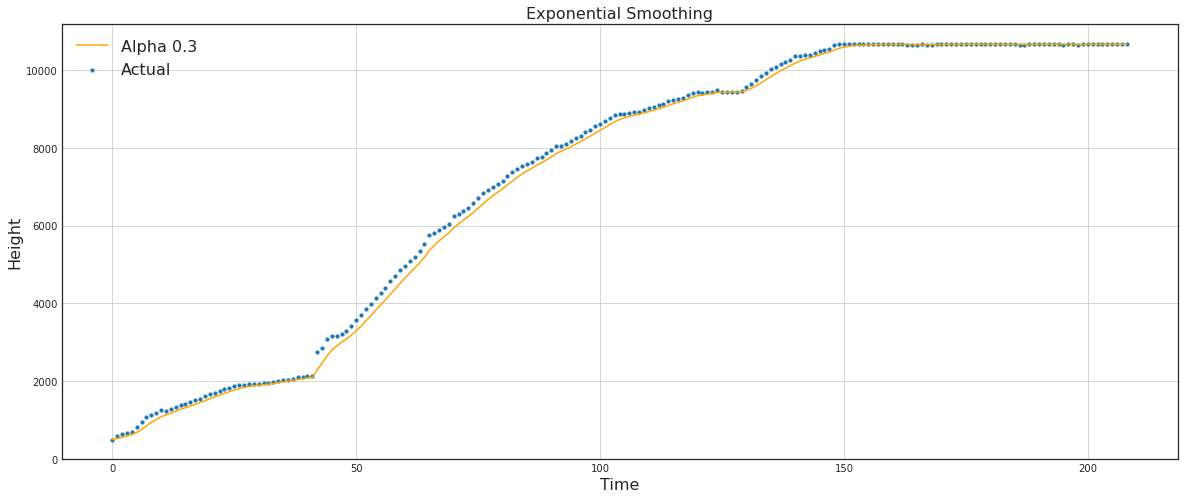

In [21]:
tmp = bad_18[bad_18.Name == 'AFL1512'].copy().reset_index(drop=True)
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3]:
        plt.plot(exponential_smoothing(tmp.Height, alpha), label="Alpha {}".format(alpha), c='orange')
    plt.scatter(range(len(tmp.Height.values)), tmp.Height.values, label = "Actual", s=10)
    plt.legend(loc="best", fontsize=16)
    plt.axis('tight')
    plt.title("Exponential Smoothing", fontsize=16)
    plt.grid(True)
    plt.ylabel('Height', fontsize=16)
    plt.xlabel('Time', fontsize=16)

In [22]:
bad_18

,Time,ID,Latitude,Longitude,Height,Code,Name
0,0:00:01,8,49.722522,40.308650,11567,1025.0,TUM9102
1,0:00:11,8,49.737334,40.285857,11567,1025.0,TUM9102
2,0:00:21,8,49.752375,40.264201,11567,1025.0,TUM9102
3,0:00:31,8,49.767809,40.243869,11567,1025.0,TUM9102
4,0:00:41,8,49.785372,40.222412,11575,1025.0,TUM9102
...,...,...,...,...,...,...,...
569245,23:59:13,3669,57.862780,41.943280,10668,1546.0,AFL1512
569246,23:59:23,3669,57.870371,41.980686,10668,1546.0,AFL1512
569247,23:59:33,3669,57.878026,42.017266,10668,1546.0,AFL1512
569248,23:59:54,3669,57.889473,42.090678,10668,1546.0,AFL1512


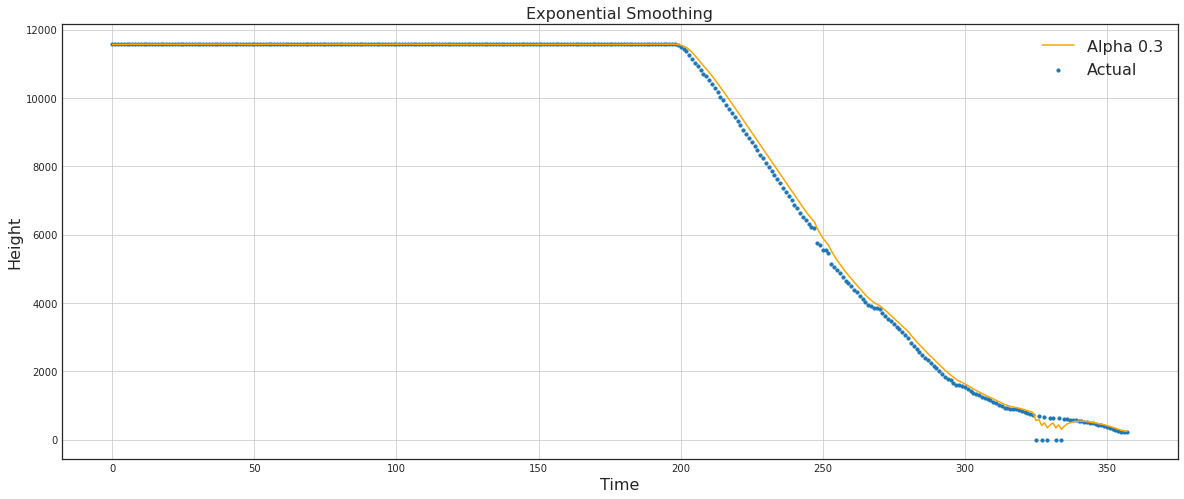

In [23]:
tmp = bad_18[bad_18.Name == 'TUM9102'].copy().reset_index(drop=True)
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3]:
        plt.plot(exponential_smoothing(tmp.Height, alpha), label="Alpha {}".format(alpha), c='orange')
    plt.scatter(range(len(tmp.Height.values)), tmp.Height.values, label = "Actual", s=10)
    plt.legend(loc="best", fontsize=16)
    plt.axis('tight')
    plt.title("Exponential Smoothing", fontsize=16)
    plt.grid(True)
    plt.ylabel('Height', fontsize=16)
    plt.xlabel('Time', fontsize=16)

In [ ]:
%%script False
def count_MSE(y_true, pred):
    res = 0
    for i in range(len(y_true)):
        res += ((y_true[i] - pred[i])**2)
    return res

In [ ]:
def count_MSE(y_true, pred):
    res = ((y_true - pred)**2)
    return max(res)

In [16]:
def count_MAE(y_true, pred):
    res = 0
    for i in range(len(y_true)):
        res += (abs(y_true[i] - pred[i]))
    return res

In [17]:
from scipy.spatial.distance import cosine, mahalanobis

In [18]:
def count_cosine(y_true, pred):
    res = 0;
    for i in range(len(y_true)):
        res += cosine(y_true[i], pred[i])
    return res

In [19]:
def count_mahalanobis(y_true, pred):
    res = abs(y_true - pred)/np.std([y_true, pred])
    return max(res)

In [20]:
def create_frame(ddf):
    ts_lat = exponential_smoothing((ddf.Latitude-ddf.Latitude.mean())/ddf.Latitude.std(), 0.4)
    ts_lon = exponential_smoothing((ddf.Longitude-ddf.Longitude.mean())/ddf.Longitude.std(), 0.4)
    #try:
    ts_hei = exponential_smoothing((ddf.Height-ddf.Height.mean())/ddf.Height.std(), 0.3)
    #except:
    #    ts_hei = np.zeros(len(ddf.Height))
    ts_time = exponential_smoothing((ddf.Time-ddf.Time.mean())/ddf.Time.std(), 0.3)
    ts_rad = exponential_smoothing((ddf.radius-ddf.radius.mean())/ddf.radius.std(), 0.3)
    ts_alpha = exponential_smoothing(ddf.alpha, 0.3)
        
    #mse_lat = count_MSE((ddf.Latitude-ddf.Latitude.mean())/ddf.Latitude.std(), ts_lat)
    #mse_lon = count_MSE((ddf.Longitude-ddf.Longitude.mean())/ddf.Longitude.std(), ts_lon)
    # тут есть случаи, когда высота одинаковая, поэтому идёт деление на 0
    try:
        mse_hei = count_MSE((ddf.Height-ddf.Height.mean())/ddf.Height.std(), ts_hei)
    except:
        mse_hei = 0
    mse_time = count_MSE((ddf.Time-ddf.Time.mean())/ddf.Time.std(), ts_time)
    mse_rad = count_MSE((ddf.radius-ddf.radius.mean())/ddf.radius.std(), ts_rad)
    
    
    mae_lat = count_MAE((ddf.Latitude-ddf.Latitude.mean())/ddf.Latitude.std(), ts_lat)
    mae_lon = count_MAE((ddf.Longitude-ddf.Longitude.mean())/ddf.Longitude.std(), ts_lon)
    
    # тут есть случаи, когда высота одинаковая, поэтому идёт деление на 0
    try:
        mae_hei = count_MAE((ddf.Height-ddf.Height.mean())/ddf.Height.std(), ts_hei)
    except:
        mae_hei = 0
    mae_time = count_MAE((ddf.Time-ddf.Time.mean())/ddf.Time.std(), ts_time)
    mae_rad = count_MAE((ddf.radius-ddf.radius.mean())/ddf.radius.std(), ts_rad)
    mae_alpha = count_MAE(ddf.alpha, ts_alpha)
    #mae_alpha1 = count_cosine(ddf.Longitude, ts_lon)
    
    mah_lat = count_mahalanobis((ddf.Latitude-ddf.Latitude.mean())/ddf.Latitude.std(), ts_lat)
    mah_lon = count_mahalanobis((ddf.Longitude-ddf.Longitude.mean())/ddf.Longitude.std(), ts_lon)
    #mah_hei = count_mahalanobis((ddf.Height-ddf.Height.mean())/ddf.Height.std(), ts_hei)
        
    # гистограмма
    #lat_hist = len(np.histogram(ddf.Latitude, bins=10)[0]) - len(np.histogram(ddf.Latitude, bins=10)[0].nonzero()[0])
    #lon_hist = len(np.histogram(ddf.Longitude, bins=10)[0]) - len(np.histogram(ddf.Longitude, bins=10)[0].nonzero()[0])
    #hei_hist = len(np.histogram(ddf.Height, bins=10)[0]) - len(np.histogram(ddf.Height, bins=10)[0].nonzero()[0])
        
    return [mse_hei, mse_time, mse_rad, mae_lat, mae_lon,
            mae_hei, mae_time, mae_rad, mae_alpha, len(ddf),
            ddf.radius.mean(), ddf.radius.std(), 
            np.mean(ts_rad), np.std(ts_rad),
            mah_lat, mah_lon,
            ]

In [21]:
bad_names = bad_18.ID.value_counts().index
bad_choice_ind = dict(zip(range(len(bad_names)), bad_names))
bad_choice_names = np.random.choice(list(bad_choice_ind.keys()), 40) # случайная подвыборка

In [22]:
%%time
trace = []
for i in bad_choice_ind.keys(): #цикл по всем ключам (позывным)
#for i in bad_choice_names: #цикл по подвыборке

    ddf = bad_18[bad_18.ID == bad_choice_ind[i]].copy().reset_index(drop=True)
    ddf.Time = ddf.Time.apply(to_seconds)
    
    ddf['radius'] = ddf.Longitude * ddf.Longitude + ddf.Latitude * ddf.Latitude
    ddf['alpha'] = (ddf.Longitude / ddf.Latitude).apply(math.atan)
    
    res = create_frame(ddf)
        
    trace.append([bad_choice_ind[i]] + res + [1])
frame = pd.DataFrame(trace)

CPU times: user 1min 17s, sys: 394 ms, total: 1min 17s
Wall time: 1min 15s


In [23]:
bad_names = bad_21.ID.value_counts().index
bad_choice_ind = dict(zip(range(len(bad_names)), bad_names))
bad_choice_names = np.random.choice(list(bad_choice_ind.keys()), 40) # случайная подвыборка

In [24]:
%%time
trace = []
for i in bad_choice_ind.keys(): #цикл по всем ключам (позывным)
#for i in bad_choice_names: #цикл по подвыборке

    ddf = bad_21[bad_21.ID == bad_choice_ind[i]].copy().reset_index(drop=True)
    ddf.Time = ddf.Time.apply(to_seconds)
    
    ddf['radius'] = ddf.Longitude * ddf.Longitude + ddf.Latitude * ddf.Latitude
    ddf['alpha'] = (ddf.Longitude / ddf.Latitude).apply(math.atan)
    
    res = create_frame(ddf)
        
    trace.append([bad_choice_ind[i]] + res + [1])
frame = frame.append(pd.DataFrame(trace))

CPU times: user 1min 27s, sys: 466 ms, total: 1min 27s
Wall time: 1min 25s


In [25]:
frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,218,0.730589,1.497162,7.631172,16.389626,14.463449,43.578830,5.312296,27.301279,1.068739,3709,5161.622989,321.661522,0.002472,0.997033,2.225310,1.773135,1
1,3589,0.181528,0.000168,0.000368,6.018218,5.912800,27.029739,9.612526,10.903166,0.358987,3555,5317.369231,273.028131,-0.003060,1.001805,0.007825,0.007942,1
2,56,0.024833,0.000290,0.000922,5.927848,5.558045,19.852815,9.812641,10.044384,0.339400,3155,5159.665988,269.148298,0.003184,0.999312,0.011923,0.026620,1
3,325,0.068456,0.000165,0.000274,5.574147,6.113248,22.510971,8.974748,9.277370,0.371097,2649,5262.916497,296.419773,-0.003502,1.001793,0.006829,0.014743,1
4,123,NaN,0.000314,0.000832,5.538057,6.050853,NaN,9.301240,9.605761,0.561601,2482,4646.076096,464.159902,-0.003870,0.997971,0.014991,0.016255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,-53,3.491250,1.083328,1.924125,4.876687,5.587887,7.201494,6.533260,6.813816,0.448695,19,4351.322648,231.538026,0.134871,0.751677,1.405715,1.706757,1
1234,-50,NaN,5.876351,5.877067,2.115928,2.085706,NaN,2.430409,2.430027,0.126701,12,4577.304757,391.450863,-0.202502,0.287541,2.841210,2.827812,1
1235,-129,1.584938,1.572267,2.007355,2.336464,1.244365,2.774844,2.785885,1.980754,0.191763,4,4683.366565,851.389001,-0.495189,0.323590,1.530134,1.767710,1
1236,-226,0.980000,0.980000,0.980000,0.848528,0.848528,0.989949,0.989949,0.989949,0.095845,2,3900.619853,188.327842,0.494975,0.212132,1.466033,1.466033,1


In [26]:
good_names = good_18.ID.value_counts().index
good_choice_ind = dict(zip(range(len(good_names)), good_names))
good_choice_names = np.random.choice(list(good_choice_ind.keys()), 40) # случайная подвыборка

In [27]:
%%time
trace = []
for i in good_choice_ind.keys(): #цикл по всем ключам (позывным)
#for i in good_choice_names: #цикл по подвыборке
    ddf = good_18[good_18.ID == good_choice_ind[i]].copy().reset_index(drop=True)
    ddf.Time = ddf.Time.apply(to_seconds)
    
    ddf['radius'] = ddf.Longitude * ddf.Longitude + ddf.Latitude * ddf.Latitude
    ddf['alpha'] = (ddf.Longitude / ddf.Latitude).apply(math.atan)
    
    res = create_frame(ddf)
        
    trace.append([good_choice_ind[i]] + res + [0])
frame = frame.append(pd.DataFrame(trace))

CPU times: user 1min 22s, sys: 422 ms, total: 1min 23s
Wall time: 1min 20s


In [28]:
good_names = good_21.ID.value_counts().index
good_choice_ind = dict(zip(range(len(good_names)), good_names))
good_choice_names = np.random.choice(list(good_choice_ind.keys()), 40) # случайная подвыборка

In [29]:
%%time
trace = []
for i in good_choice_ind.keys(): #цикл по всем ключам (позывным)
#for i in good_choice_names: #цикл по подвыборке
    ddf = good_21[good_21.ID == good_choice_ind[i]].copy().reset_index(drop=True)
    ddf.Time = ddf.Time.apply(to_seconds)
    
    ddf['radius'] = ddf.Longitude * ddf.Longitude + ddf.Latitude * ddf.Latitude
    ddf['alpha'] = (ddf.Longitude / ddf.Latitude).apply(math.atan)
    
    res = create_frame(ddf)
        
    trace.append([good_choice_ind[i]] + res + [0])
frame = frame.append(pd.DataFrame(trace))

CPU times: user 1min 21s, sys: 437 ms, total: 1min 22s
Wall time: 1min 19s


In [30]:
columns = ['id', 'mse_hei', 'mse_time', 'mse_rad', 'mae_lat', 'mae_lon',
                 'mae_hei', 'mae_time', 'mae_rad', 'mae_alpha',
                 'cnt', 'a', 'b', 'c', 'd', 'e', 'f', 'target']

In [31]:
frame.columns = columns

In [32]:
frame.isna().sum()

id             0
mse_hei      562
mse_time       0
mse_rad        0
mae_lat        0
mae_lon        0
mae_hei      562
mae_time       0
mae_rad        0
mae_alpha      0
cnt            0
a              0
b              0
c              0
d              0
e              0
f              0
target         0
dtype: int64

In [33]:
frame

,id,mse_hei,mse_time,mse_rad,mae_lat,mae_lon,mae_hei,mae_time,mae_rad,mae_alpha,cnt,a,b,c,d,e,f,target
0,218,0.730589,1.497162,7.631172,16.389626,14.463449,43.578830,5.312296,27.301279,1.068739,3709,5161.622989,321.661522,0.002472,0.997033,2.225310,1.773135,1
1,3589,0.181528,0.000168,0.000368,6.018218,5.912800,27.029739,9.612526,10.903166,0.358987,3555,5317.369231,273.028131,-0.003060,1.001805,0.007825,0.007942,1
2,56,0.024833,0.000290,0.000922,5.927848,5.558045,19.852815,9.812641,10.044384,0.339400,3155,5159.665988,269.148298,0.003184,0.999312,0.011923,0.026620,1
3,325,0.068456,0.000165,0.000274,5.574147,6.113248,22.510971,8.974748,9.277370,0.371097,2649,5262.916497,296.419773,-0.003502,1.001793,0.006829,0.014743,1
4,123,NaN,0.000314,0.000832,5.538057,6.050853,NaN,9.301240,9.605761,0.561601,2482,4646.076096,464.159902,-0.003870,0.997971,0.014991,0.016255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,-3788,NaN,0.009032,0.010867,9.603953,4.968324,NaN,7.691171,7.714382,0.098471,90,3675.718376,53.737114,0.085715,0.987806,0.437287,0.066775,0
1145,-3058,NaN,0.009628,0.012413,4.995864,5.033897,NaN,7.759922,7.764925,0.092630,90,3670.773531,58.652882,0.086277,0.990288,0.149172,0.074321,0
1146,-3790,2.154310,0.009883,0.010762,4.961782,4.982785,29.419332,7.630451,7.662413,0.017957,85,3660.397092,67.186689,0.090146,0.989942,0.070501,0.069156,0
1147,-2646,NaN,0.014416,0.017351,5.303163,4.935001,NaN,7.671815,7.657185,0.076087,73,3694.702857,51.843181,0.104893,0.985507,0.210966,0.093338,0


In [34]:
frame.fillna(0, inplace=True)

<AxesSubplot:>

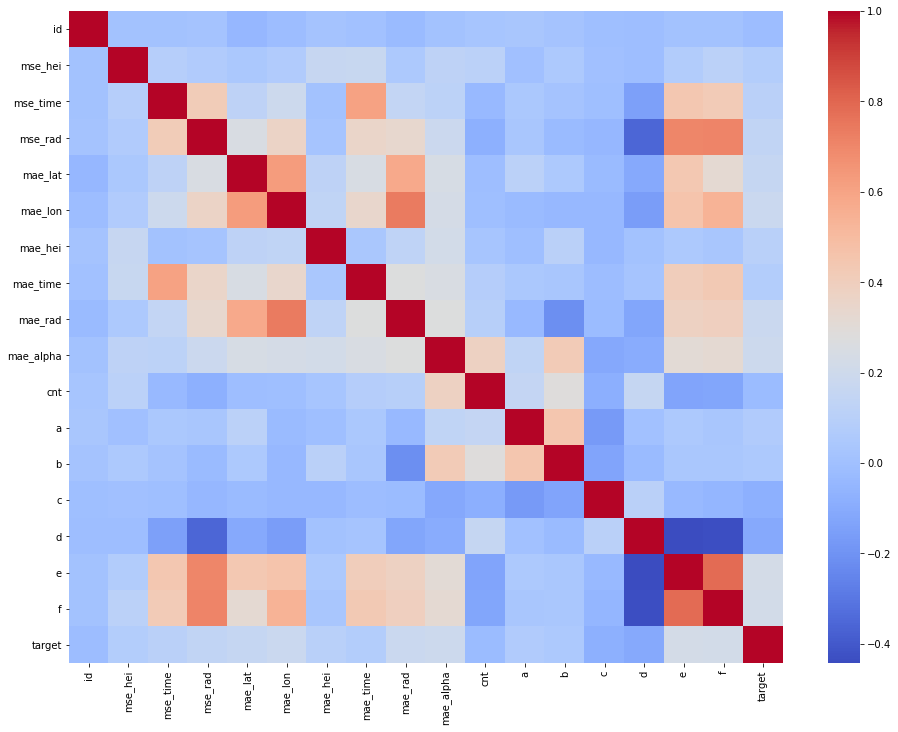

In [35]:
plt.figure(figsize=(16,12))
sns.heatmap(frame.corr(), cmap='coolwarm')

## Тестовая выборка

In [36]:
bad_names = bad_23.ID.value_counts().index
bad_choice_ind = dict(zip(range(len(bad_names)), bad_names))
bad_choice_names = np.random.choice(list(bad_choice_ind.keys()), 40) # случайная подвыборка

In [37]:
%%time
trace = []
for i in bad_choice_ind.keys(): #цикл по всем ключам (позывным)
#for i in bad_choice_names: #цикл по подвыборке

    ddf = bad_23[bad_23.ID == bad_choice_ind[i]].copy().reset_index(drop=True)
    ddf.Time = ddf.Time.apply(to_seconds)
    
    ddf['radius'] = ddf.Longitude * ddf.Longitude + ddf.Latitude * ddf.Latitude
    ddf['alpha'] = (ddf.Longitude / ddf.Latitude).apply(math.atan)
    
    res = create_frame(ddf)
        
    trace.append([bad_choice_ind[i]] + res + [1])
test_frame = pd.DataFrame(trace)

CPU times: user 1min 13s, sys: 390 ms, total: 1min 14s
Wall time: 1min 12s


In [38]:
good_names = good_23.ID.value_counts().index
good_choice_ind = dict(zip(range(len(good_names)), good_names))
good_choice_names = np.random.choice(list(good_choice_ind.keys()), 40) # случайная подвыборка

In [39]:
%%time
trace = []
for i in good_choice_ind.keys(): #цикл по всем ключам (позывным)
#for i in good_choice_names: #цикл по подвыборке
    ddf = good_23[good_23.ID == good_choice_ind[i]].copy().reset_index(drop=True)
    ddf.Time = ddf.Time.apply(to_seconds)
    
    ddf['radius'] = ddf.Longitude * ddf.Longitude + ddf.Latitude * ddf.Latitude
    ddf['alpha'] = (ddf.Longitude / ddf.Latitude).apply(math.atan)
    
    res = create_frame(ddf)
        
    trace.append([good_choice_ind[i]] + res + [0])
test_frame = test_frame.append(pd.DataFrame(trace))

CPU times: user 1min 26s, sys: 446 ms, total: 1min 27s
Wall time: 1min 24s


In [40]:
test_frame.columns = columns

In [41]:
test_frame

,id,mse_hei,mse_time,mse_rad,mae_lat,mae_lon,mae_hei,mae_time,mae_rad,mae_alpha,cnt,a,b,c,d,e,f,target
0,3484,0.025296,0.000153,0.000483,5.903929,5.288175,27.348187,9.401457,9.653115,0.409324,3489,5286.380409,313.433473,-0.002747,1.001048,0.007764,0.018912,1
1,273,0.534623,0.003048,0.003430,5.882940,6.395757,28.182688,9.474830,10.244362,0.380895,2793,5286.222225,302.519008,-0.003565,1.001395,0.034851,0.018678,1
2,6,0.007397,0.000402,0.000281,5.421656,6.864215,11.300120,9.516511,8.735734,0.252853,2742,5038.257642,229.418623,0.003175,0.998789,0.008437,0.028490,1
3,3301,0.782490,0.013456,0.001144,5.627369,9.315939,29.457599,9.552006,7.991127,0.357749,2529,4903.715896,399.132698,-0.002941,0.997889,0.029967,0.255161,1
4,3541,NaN,0.000165,0.000273,5.619941,5.734387,NaN,8.891876,9.041336,0.527995,2247,4673.173060,407.156708,-0.004024,0.998946,0.008115,0.008918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2101,NaN,0.013819,0.012989,5.431102,4.939564,NaN,7.682908,7.700410,0.076308,76,3690.176430,49.632819,0.101321,0.987201,0.230031,0.076992,0
1192,2288,NaN,0.013502,0.013772,4.999019,5.003976,NaN,7.688613,7.696003,0.030188,76,3642.644610,60.593980,0.101263,0.985945,0.107466,0.081921,0
1193,2803,NaN,0.013343,0.013252,5.398766,4.939787,NaN,7.660606,7.683043,0.075263,76,3693.444083,48.901361,0.101093,0.985657,0.205210,0.076973,0
1194,1403,NaN,0.014857,0.015120,5.165373,4.962809,NaN,7.673259,7.671308,0.074487,73,3695.335043,48.011244,0.105086,0.985365,0.197482,0.082211,0


In [42]:
test_frame.fillna(0, inplace=True)

### Модель случайного леса

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [44]:
%%script False
x_train, x_test, y_train, y_test = train_test_split(frame.drop('target', axis=1), frame.target,
                                                    shuffle=True, random_state=42, test_size=0.4)

Couldn't find program: 'False'


In [45]:
x_train, _, y_train, _ = train_test_split(frame.drop('target', axis=1), frame.target,
                                                    shuffle=True, random_state=42, test_size=0.001)

In [46]:
_, x_test, _, y_test = train_test_split(test_frame.drop('target', axis=1), test_frame.target,
                                                    shuffle=True, random_state=42, test_size=0.999)

In [47]:
forest = RandomForestClassifier(n_estimators=500, random_state=17, n_jobs=6)
forest.fit(x_train, y_train)
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1195
           1       0.84      0.76      0.80       974

    accuracy                           0.83      2169
   macro avg       0.83      0.83      0.83      2169
weighted avg       0.83      0.83      0.83      2169



In [48]:
forest.score(x_test, y_test)

0.8312586445366529

In [126]:
x_test

,id,mse_lat,mse_lon,mse_hei,mse_time,mse_rad,mae_lat,mae_lon,mae_hei,mae_time,mae_rad,mae_alpha,cnt,a,b,c,d,e,f
677,2167,0.003778,0.000925,0.008601,0.001259,0.001413,4.681214,4.641425,6.367670,7.880498,7.521419,0.246212,400,5023.195147,367.808073,0.018804,1.003725,0.061656,0.030373
342,2791,0.015890,0.000117,4.646185,0.000251,0.000306,15.244304,4.856639,17.344844,8.016419,7.600099,0.417898,609,5149.567683,473.663263,0.012391,1.002575,0.126278,0.010817
367,219,0.000155,0.000288,0.044720,0.000304,0.000402,4.872085,5.215866,11.442956,8.043391,7.973169,0.145305,601,4535.609399,561.079557,0.013267,1.000646,0.012490,0.016975
765,7,0.000678,0.001027,83.804402,0.001076,0.004217,5.024539,5.218619,31.343269,7.871807,8.769077,0.242411,341,4260.029488,81.425566,0.015935,0.984401,0.026110,0.031976
865,1380,0.004454,0.001760,16.423567,0.003223,0.003280,5.230171,4.684735,14.621400,7.541542,7.539855,0.232459,238,4178.576325,240.269112,-0.031093,0.998829,0.066464,0.042078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1818,0.005186,0.000227,0.000000,0.000201,0.001284,5.615758,5.216459,0.000000,8.073371,8.135518,0.380366,687,5130.348378,387.229749,0.011842,1.000570,0.072154,0.015084
466,935,0.000466,0.003321,10.561395,0.000934,0.001102,5.027658,6.660818,19.494001,7.912996,8.351154,0.275115,547,4121.860041,244.537203,0.015267,0.994876,0.021606,0.057557
663,2581,0.000902,0.000821,0.024475,0.001537,0.001375,4.926528,4.908128,9.889036,7.830120,7.671689,0.326075,407,5294.671179,497.798288,-0.018849,0.996551,0.030003,0.028704
120,1082,0.000128,0.000142,0.000000,0.000302,0.000402,5.331665,5.365847,0.000000,8.324465,8.452969,0.558713,1017,4793.447315,482.567977,-0.008312,0.997228,0.011296,0.011932


In [127]:
prediction = forest.predict(x_test)

In [128]:
x_test[prediction == 0]

,id,mse_lat,mse_lon,mse_hei,mse_time,mse_rad,mae_lat,mae_lon,mae_hei,mae_time,mae_rad,mae_alpha,cnt,a,b,c,d,e,f
677,2167,0.003778,0.000925,0.008601,0.001259,0.001413,4.681214,4.641425,6.367670,7.880498,7.521419,0.246212,400,5023.195147,367.808073,0.018804,1.003725,0.061656,0.030373
367,219,0.000155,0.000288,0.044720,0.000304,0.000402,4.872085,5.215866,11.442956,8.043391,7.973169,0.145305,601,4535.609399,561.079557,0.013267,1.000646,0.012490,0.016975
923,2524,0.000796,0.000701,0.000000,0.001573,0.001434,5.040706,5.039324,0.000000,7.832478,7.821030,0.120042,268,4171.135491,91.848044,0.029183,0.997684,0.028281,0.026524
1119,137,0.001655,0.001588,0.019792,0.002772,0.003550,4.938802,5.019020,7.824640,7.884645,7.733230,0.058432,153,5726.342552,187.119067,-0.050544,0.990092,0.040812,0.040074
10,449,0.000127,0.000520,0.021094,0.000245,0.000272,5.076595,6.380316,16.655301,8.639108,8.231331,0.201326,1727,5092.595952,376.569903,0.004663,1.000282,0.011251,0.022835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2847,0.000587,0.001218,0.231939,0.001232,0.000915,5.243325,5.199506,15.222128,8.098955,8.117454,0.363886,492,4207.758164,171.297167,0.016499,0.996349,0.024264,0.034885
263,1818,0.005186,0.000227,0.000000,0.000201,0.001284,5.615758,5.216459,0.000000,8.073371,8.135518,0.380366,687,5130.348378,387.229749,0.011842,1.000570,0.072154,0.015084
663,2581,0.000902,0.000821,0.024475,0.001537,0.001375,4.926528,4.908128,9.889036,7.830120,7.671689,0.326075,407,5294.671179,497.798288,-0.018849,0.996551,0.030003,0.028704
120,1082,0.000128,0.000142,0.000000,0.000302,0.000402,5.331665,5.365847,0.000000,8.324465,8.452969,0.558713,1017,4793.447315,482.567977,-0.008312,0.997228,0.011296,0.011932


In [129]:
prediction

array([0, 1, 0, ..., 0, 0, 0])

In [130]:
pred_proba_0 = forest.predict_proba(x_test)[:, 0]
pred_proba_1 = forest.predict_proba(x_test)[:, 1]

In [131]:
x_test['pred_proba_0'] = pred_proba_0
x_test['pred_proba_1'] = pred_proba_1

In [132]:
x_test[['id', 'pred_proba_0', 'pred_proba_1']]

,id,pred_proba_0,pred_proba_1
677,2167,0.842,0.158
342,2791,0.014,0.986
367,219,0.894,0.106
765,7,0.396,0.604
865,1380,0.070,0.930
...,...,...,...
263,1818,0.994,0.006
466,935,0.018,0.982
663,2581,0.702,0.298
120,1082,0.994,0.006


In [105]:
from sklearn.metrics import roc_auc_score

In [112]:
roc_auc_score(y_test, forest.predict_proba(x_test)[:,1])

0.9114878042493965

### Сохранение модели

In [49]:
import pickle

In [50]:
filename = 'forest_model.pkl'
pickle.dump(forest, open(filename, 'wb'))

In [51]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.score(x_test, y_test)

0.8312586445366529

In [26]:
forest = RandomForestClassifier(random_state=17)
forest.fit(x_train, y_train)
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       454
           1       0.78      0.73      0.75       434

    accuracy                           0.77       888
   macro avg       0.77      0.77      0.77       888
weighted avg       0.77      0.77      0.77       888



In [50]:
from xgboost import XGBClassifier

In [51]:
xg_boost = XGBClassifier(n_estimators=500, random_state = 42, use_label_encoder=False)
xg_boost.fit(x_train, y_train)
print(classification_report(y_test, xg_boost.predict(x_test)))

[10:04:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1195
           1       0.83      0.80      0.82       974

    accuracy                           0.84      2169
   macro avg       0.84      0.83      0.84      2169
weighted avg       0.84      0.84      0.84      2169



In [52]:
xg_boost.score(x_test, y_test)

0.8377132319041033

In [30]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       454
           1       0.79      0.76      0.77       434

    accuracy                           0.78       888
   macro avg       0.78      0.78      0.78       888
weighted avg       0.78      0.78      0.78       888



In [31]:
x_test[y_test==1]


,mse_hei,mse_time,mse_rad,mae_hei,mae_time,mae_rad,mae_alpha,cnt
450,1.249811,0.122442,0.127866,11.715346,7.752598,7.773504,0.432736,542
96,0.709089,0.087213,0.115563,15.261889,8.405444,8.791787,0.376847,888
650,0.919865,0.152243,0.187767,13.666230,7.954083,7.262408,0.321831,424
1061,17.682570,4.359012,24.955974,15.847768,7.404577,17.356509,0.755875,70
772,173.313111,0.266734,43.215845,196.273628,8.384827,87.287079,0.029264,328
...,...,...,...,...,...,...,...,...
598,0.622926,0.137256,0.138204,8.515934,7.675148,7.443366,0.354362,453
377,165.175484,0.124087,0.121861,200.498316,8.235490,8.257815,0.611288,591
41,9.235232,0.102926,1.567124,22.583195,9.444568,23.082800,0.235854,1229
1068,15.955859,13.295314,14.894462,10.726946,8.811171,9.399557,0.128086,40


In [53]:
def plot_pr_curve(y_true, prediction):
    plt.figure(figsize=(12,9))
    precision, recall, thresholds = precision_recall_curve(y_true, prediction)
    thresholds = [0] + thresholds.tolist()
    plt.plot(thresholds, precision, label='precision');
    plt.plot(thresholds, recall, label='recall');
    plt.legend(fontsize=16); plt.xlabel('Threshold', fontsize=16); #plt.ylabel('Precision or recall');
    plt.title('Precision и recall кривые для класса 1', fontsize=16);
    plt.grid()

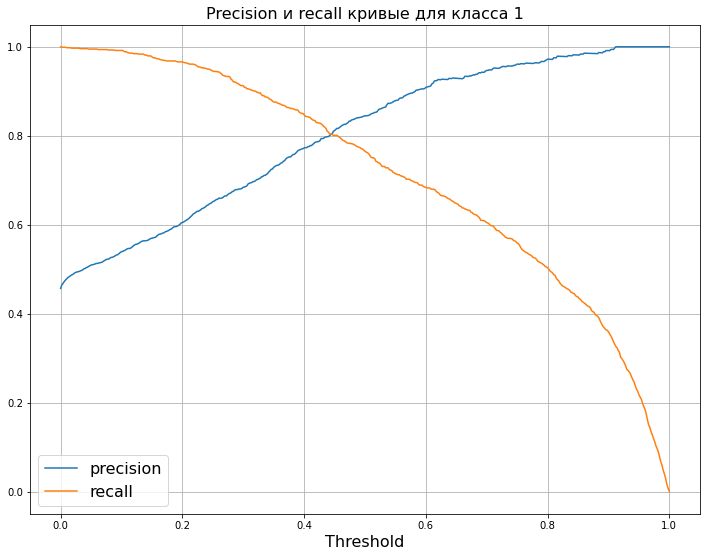

In [54]:
plot_pr_curve(y_test, forest.predict_proba(x_test)[:,1])

<Figure size 864x864 with 0 Axes>

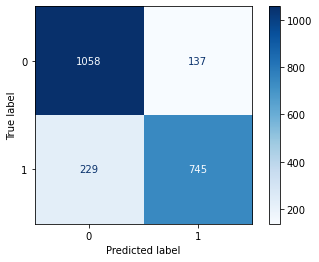

In [52]:
plot_confusion_matrix(forest, x_test, y_test, cmap=plt.cm.Blues)

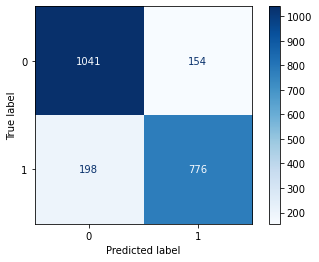

In [57]:
plot_confusion_matrix(xg_boost, x_test, y_test, cmap=plt.cm.Blues)